# Intermediate Net in TF

#### Dependencies

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
from matplotlib import pyplot as plt

#### Load Data

In [2]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Set hyperparameters

In [4]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)


(10000, 784)
(10000, 10)


(55000, 10)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


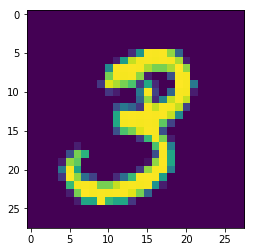

In [5]:
index = 1
print(mnist.train.labels.shape)
print(mnist.train.labels[index])
gen_image(mnist.train.images[index]).show()

In [6]:
lr = 0.1
epochs = 10
batch_size = 128
weight_initializer = tf.contrib.layers.xavier_initializer()

In [7]:
n_input = 28*28
n_dense_1 = 64
n_dense_2 = 64
n_classes = 10

#### Define placeholder Tensors

In [8]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

#### Define layers

In [9]:
def dense(x, W, b):
    z = tf.add(tf.matmul(x,W),b)
    a = tf.nn.relu(z)
    return a

#### Design neural network architecture 

In [10]:
def network(x, weights, biases):
    
    # two dense hidden layers
    dense_1 = dense(x, weights['W1'], biases['b1'])
    dense_2 = dense(dense_1, weights['W2'], biases['b2'])
    
    # linear output layer
    out_layer_z = tf.add(tf.matmul(dense_2, weights['W_out']),biases['b_out'])
    return out_layer_z 
    

#### Define variable dictionaries

In [11]:
bias_dict = {
    'b1' : tf.Variable(tf.zeros([n_dense_1])),
    'b2' : tf.Variable(tf.zeros([n_dense_2])),
    'b_out' : tf.Variable(tf.zeros([n_classes]))
    
}

weights_dict = {
    'W1' : tf.get_variable('W1', [n_input, n_dense_1], initializer=weight_initializer), 
    'W2' : tf.get_variable('W2', [n_dense_1, n_dense_2], initializer=weight_initializer),
    'W_out': tf.get_variable('W_out', [n_dense_2, n_classes], initializer=weight_initializer)
}

#### Build model

In [12]:
predictions = network(x, weights=weights_dict, biases=bias_dict)


In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

#### Define evaluation metrics

In [14]:
correct_prediction = tf.equal(tf.argmax(predictions,1), tf.argmax(y,1))
accuracy_pct = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))*100

#### Initialization Op

In [15]:
initializer_op = tf.global_variables_initializer()

#### Train network in a session

In [16]:
with tf.Session() as session:
    session.run(initializer_op)
    print("Training for ", epochs, " epochs.")
    
    for epoch in range(epochs):
        
        avg_cost= 0.0
        avg_accuracy_pct=0.0
        
        n_batches = int(mnist.train.num_examples / batch_size)
        for i in range(n_batches):
            batch_x, batch_y =  mnist.train.next_batch(batch_size)
            _, batch_cost, batch_acc = session.run([optimizer, cost, accuracy_pct],
                feed_dict={x:batch_x,y: batch_y})
            avg_cost += batch_cost/n_batches
            avg_accuracy_pct += batch_acc/n_batches
        
        # output logs at end of each epoch of training:
        print("Epoch ", '%03d' % (epoch+1), 
              ": cost = ", '{:.3f}'.format(avg_cost), 
              ", accuracy = ", '{:.2f}'.format(avg_accuracy_pct), "%", 
              sep='')
    
    print("Training Complete. Testing Model.\n")
                    
    test_cost = cost.eval({x: mnist.test.images, y: mnist.test.labels})
    test_accuracy_pct = accuracy_pct.eval({x: mnist.test.images, y: mnist.test.labels})  
                    
    print("Test Cost:", '{:.3f}'.format(test_cost))
    print("Test Accuracy: ", '{:.2f}'.format(test_accuracy_pct), "%", sep='')

Training for  10  epochs.
Epoch 001: cost = 0.500, accuracy = 85.40%
Epoch 002: cost = 0.250, accuracy = 92.61%
Epoch 003: cost = 0.192, accuracy = 94.40%
Epoch 004: cost = 0.158, accuracy = 95.44%
Epoch 005: cost = 0.136, accuracy = 95.99%
Epoch 006: cost = 0.120, accuracy = 96.43%
Epoch 007: cost = 0.106, accuracy = 96.96%
Epoch 008: cost = 0.095, accuracy = 97.18%
Epoch 009: cost = 0.086, accuracy = 97.48%
Epoch 010: cost = 0.078, accuracy = 97.67%
Training Complete. Testing Model.

Test Cost: 0.096
Test Accuracy: 96.97%
